In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import numpy as np

In [6]:
url = "https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing/data"

In [7]:
response = requests.get(url)

In [8]:
soup = BeautifulSoup(response.content, "html.parser")

In [9]:
table = soup.find("table")

In [10]:
headers = [th.text.strip() for th in table.find_all("th")]

AttributeError: 'NoneType' object has no attribute 'find_all'

In [11]:
rows = []
for tr in table.find_all("tr"):
    row = [td.text.strip() for td in tr.find_all("td")]
    if row:
        rows.append(row)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [14]:
df = pd.DataFrame(rows)

In [15]:
df.to_csv("dataa.csv", index=False)

In [16]:
df.to_excel('dataa.xlsx', index=False)

In [18]:
df = pd.read_csv('dataa.csv')

EmptyDataError: No columns to parse from file

In [87]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [4]:
df = pd.read_csv("dataa.csv")

NameError: name 'pd' is not defined

In [121]:
df = df.drop(columns=["RH", "NOx", "NMHC", "NO", "TEMP", "CH4"])

In [122]:
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors="coerce")
df["PM10"] = pd.to_numeric(df["PM10"], errors="coerce")
df["NO2"] = pd.to_numeric(df["NO2"], errors="coerce")
df["SO2"] = pd.to_numeric(df["SO2"], errors="coerce")
df["O3"] = pd.to_numeric(df["O3"], errors="coerce")
df["CO"] = pd.to_numeric(df["CO"], errors="coerce")


In [123]:
imputer = SimpleImputer(strategy="mean")
df[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]] = imputer.fit_transform(df[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]])


In [124]:
scaler = StandardScaler()
df[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]] = scaler.fit_transform(df[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]])


In [125]:
input_dir = 'input'
input_data_file = 'dataa.csv'

In [126]:
scaler = StandardScaler()
df[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]] = scaler.fit_transform(df[["PM2.5", "PM10", "NO2", "SO2", "O3", "CO"]])

In [127]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [128]:
ct = ColumnTransformer(transformers=[("encoder", encoder, ["Station Name"])], remainder="passthrough")

In [129]:
df.to_csv('preprocessed_data.csv', index=False)

In [130]:
print(df)

              CO       NO2        O3      PM10         PM2.5       SO2
0       0.423849 -0.159306  0.468735  5.756435 -5.147754e-17  1.522716
1       0.442534 -0.159306  0.409848  5.798972 -5.147754e-17  1.345209
2       0.274368 -0.410996  0.527622  5.160915 -5.147754e-17  0.812688
3       0.180942 -0.578790  0.586509  4.480321 -5.147754e-17  0.546428
4      -0.061965 -0.662687  0.527622  3.799726 -5.147754e-17  0.368921
...          ...       ...       ...       ...           ...       ...
218634  0.909663  1.770322  0.350962  3.714652  4.079459e+00  0.191414
218635  0.741497  1.602528  0.115414  3.842264  4.613919e+00  0.049409
218636  0.479904  0.847457  0.292075  3.757189  4.003107e+00  0.013907
218637  0.592015  1.183044 -0.120133  3.331818  4.384865e+00  0.209165
218638  0.517275  0.931354 -0.002359  3.331818  4.384865e+00 -0.003844

[218639 rows x 6 columns]


In [131]:
subset_df = df.iloc[:, :10000]
print(subset_df)

              CO       NO2        O3      PM10         PM2.5       SO2
0       0.423849 -0.159306  0.468735  5.756435 -5.147754e-17  1.522716
1       0.442534 -0.159306  0.409848  5.798972 -5.147754e-17  1.345209
2       0.274368 -0.410996  0.527622  5.160915 -5.147754e-17  0.812688
3       0.180942 -0.578790  0.586509  4.480321 -5.147754e-17  0.546428
4      -0.061965 -0.662687  0.527622  3.799726 -5.147754e-17  0.368921
...          ...       ...       ...       ...           ...       ...
218634  0.909663  1.770322  0.350962  3.714652  4.079459e+00  0.191414
218635  0.741497  1.602528  0.115414  3.842264  4.613919e+00  0.049409
218636  0.479904  0.847457  0.292075  3.757189  4.003107e+00  0.013907
218637  0.592015  1.183044 -0.120133  3.331818  4.384865e+00  0.209165
218638  0.517275  0.931354 -0.002359  3.331818  4.384865e+00 -0.003844

[218639 rows x 6 columns]


In [132]:
df = df.head(10000)
print(df)

            CO       NO2        O3      PM10         PM2.5       SO2
0     0.423849 -0.159306  0.468735  5.756435 -5.147754e-17  1.522716
1     0.442534 -0.159306  0.409848  5.798972 -5.147754e-17  1.345209
2     0.274368 -0.410996  0.527622  5.160915 -5.147754e-17  0.812688
3     0.180942 -0.578790  0.586509  4.480321 -5.147754e-17  0.546428
4    -0.061965 -0.662687  0.527622  3.799726 -5.147754e-17  0.368921
...        ...       ...       ...       ...           ...       ...
9995 -0.248817 -0.578790  1.352038  0.056458  8.726983e-01 -0.270104
9996 -0.304873 -0.713025  1.705359  0.013921  8.726983e-01 -0.252353
9997 -0.286187 -0.410996  1.234264  0.098995  7.199954e-01 -0.163600
9998 -0.230132  0.092385  0.704283  0.311681  8.726983e-01 -0.021594
9999 -0.192762  0.176282  0.880943  0.481829  1.483510e+00  0.191414

[10000 rows x 6 columns]


In [133]:
df.to_csv('preprocessed_dataa.csv', index=False)

In [134]:
df.describe()

,CO,NO2,O3,PM10,PM2.5,SO2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.047064,0.331980,-0.156350,0.156302,0.187136,0.034976
std,0.643917,0.877668,1.097371,0.994734,0.997160,0.433142
min,-0.940168,-1.342252,-1.698300,-1.602491,-1.417845,-0.642869
25%,-0.360928,-0.327100,-1.003436,-0.539062,-0.501628,-0.252353
50%,-0.080651,0.176282,-0.179020,-0.071153,-0.043519,-0.074846
75%,0.274368,0.847457,0.468735,0.609441,0.567293,0.191414
max,10.158820,5.126197,6.769627,5.798972,6.064596,5.072856


In [135]:
df.head()

,CO,NO2,O3,PM10,PM2.5,SO2
0,0.423849,-0.159306,0.468735,5.756435,-5.147754e-17,1.522716
1,0.442534,-0.159306,0.409848,5.798972,-5.147754e-17,1.345209
2,0.274368,-0.410996,0.527622,5.160915,-5.147754e-17,0.812688
3,0.180942,-0.578790,0.586509,4.480321,-5.147754e-17,0.546428
4,-0.061965,-0.662687,0.527622,3.799726,-5.147754e-17,0.368921


In [138]:
import seaborn as sns

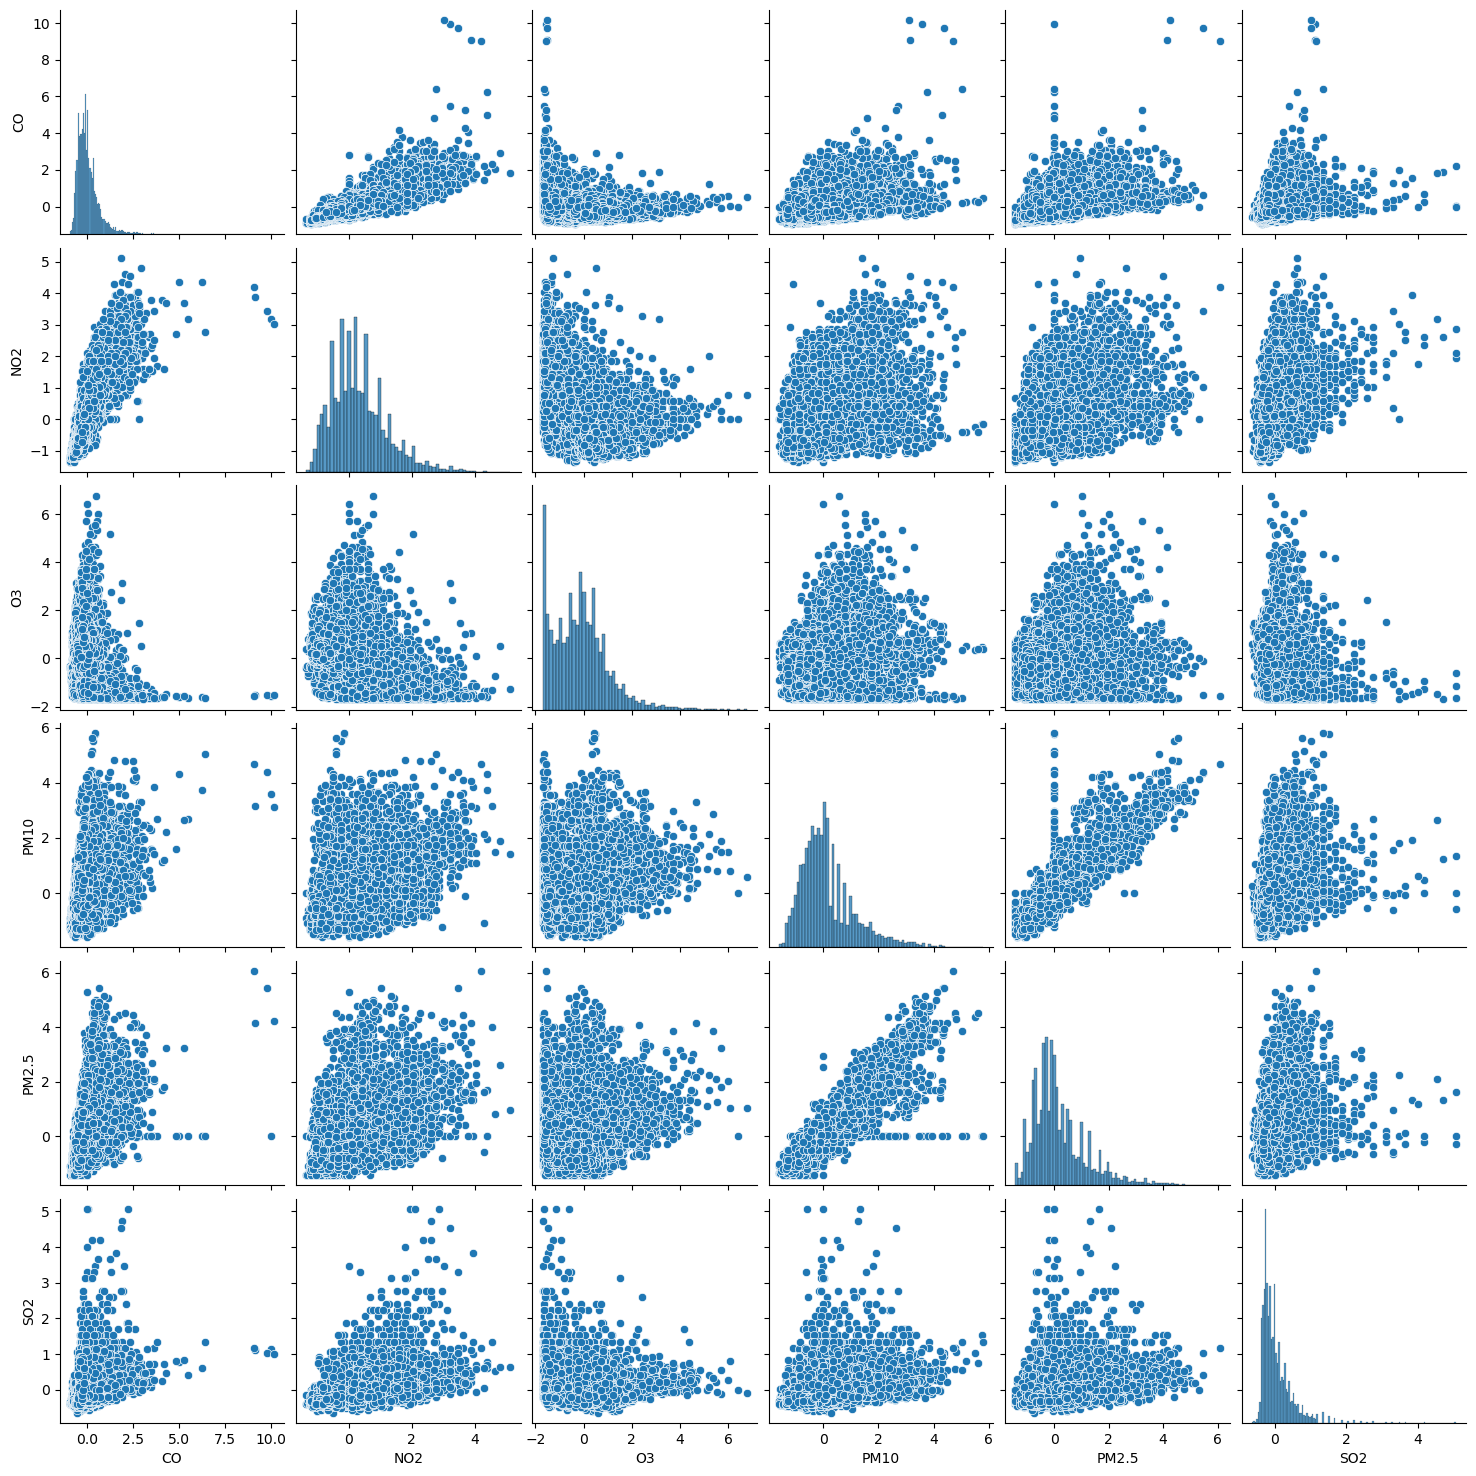

In [139]:
sns.pairplot(df)

In [160]:
import matplotlib.pyplot as plt

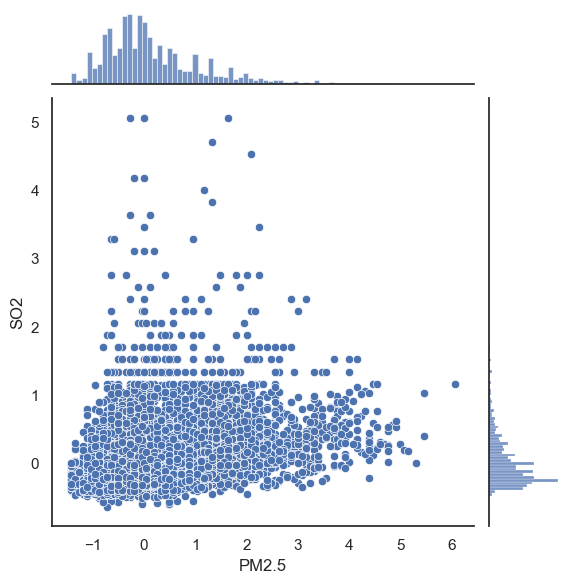

In [162]:
sns.jointplot(data=df, x='PM2.5',y='SO2')
plt.show()

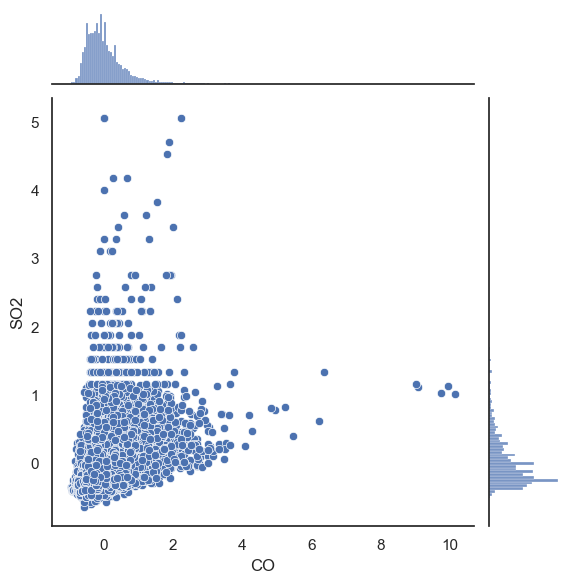

In [163]:
sns.jointplot(data=df, x='CO',y='SO2')
plt.show()

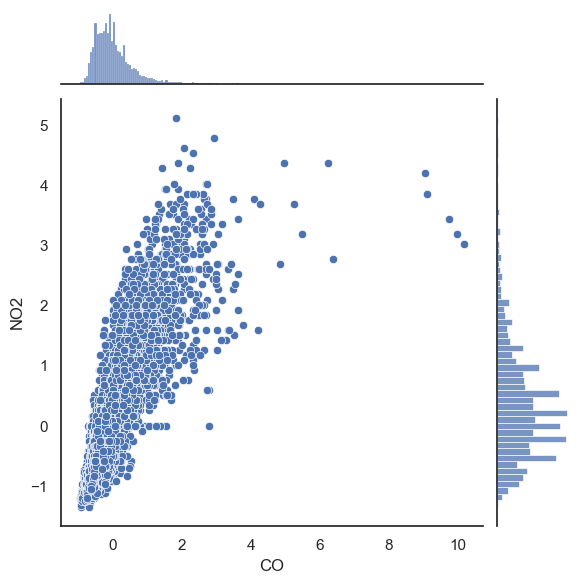

In [166]:
sns.jointplot(data=df, x='CO',y='NO2')
plt.show()

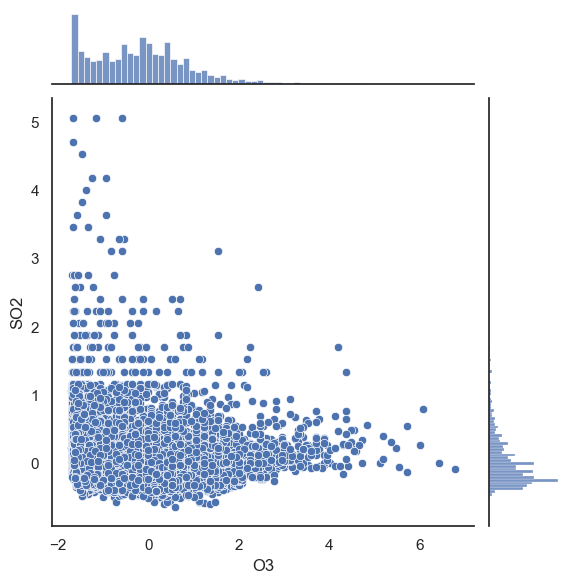

In [167]:
sns.jointplot(data=df, x='O3',y='SO2')
plt.show()

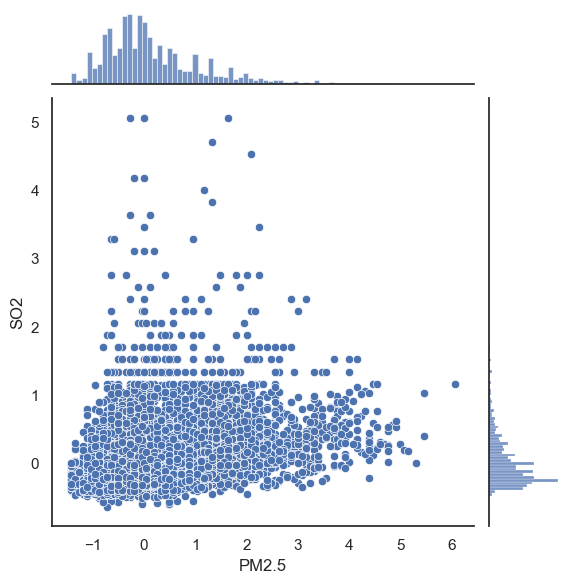

In [174]:
sns.jointplot(data=df, x='PM2.5',y='SO2')
plt.show()

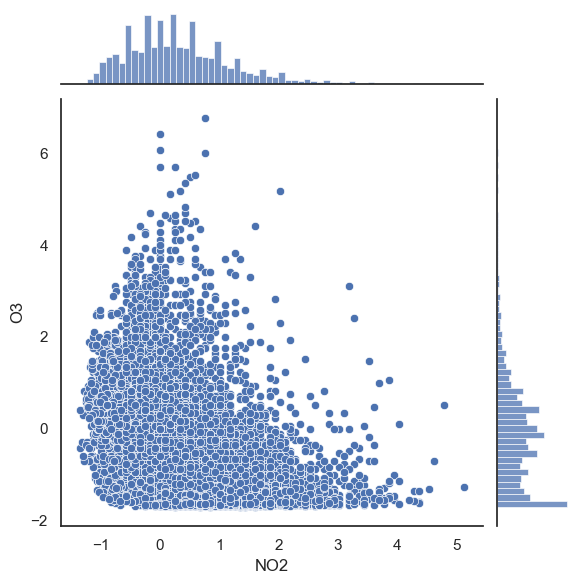

In [179]:
sns.jointplot(data=df, x='NO2',y='O3')
plt.show()

In [180]:
from sklearn.feature_selection import SelectKBest, f_regression



In [181]:
# Select top 10 features based on F-test
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Print selected feature names
feature_names = list(X.columns[selector.get_support()])
print("Selected features:", feature_names)


NameError: name 'X' is not defined

In [182]:
from sklearn.feature_selection import SelectKBest, f_regression

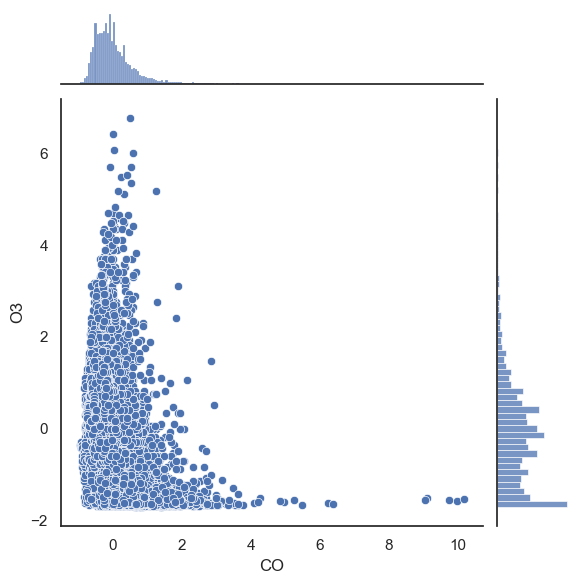

In [183]:
sns.jointplot(data=df, x='CO',y='O3')
plt.show()

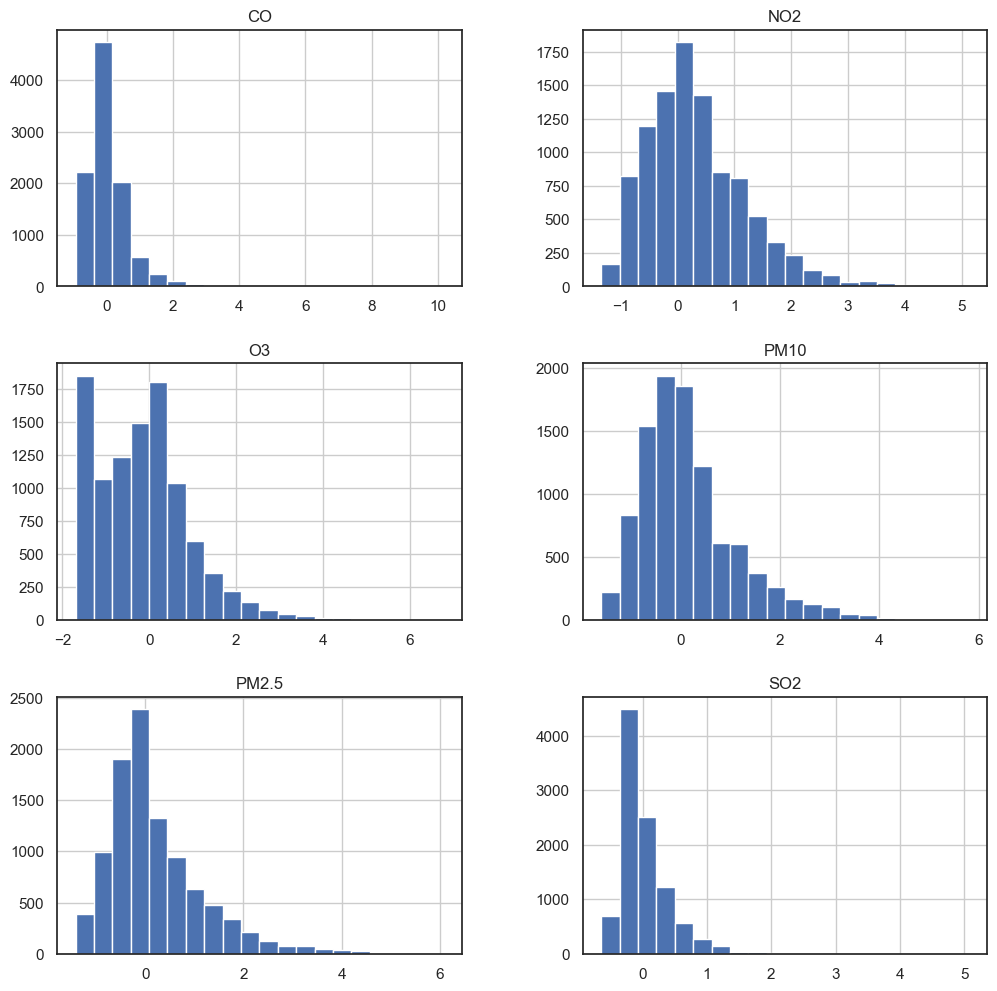

In [184]:
df.hist(figsize=(12,12), bins=20)
plt.show()

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [3]:
X = df.drop('target_variable_name', axis=1)
y = df['target_variable_name'] 

NameError: name 'df' is not defined